# Tutorial: Using DataSource and Pipeline

> Using `DataSource`, `Pipeline`, and `Transform`s to load the Pets dataset.

In [ ]:
from fastai_local.imports import *
from fastai_local.test import *
from fastai_local.core import *
from fastai_local.data.pipeline import *
from fastai_local.data.source import *
from fastai_local.data.core import *
from fastai.datasets import *

In [ ]:
from PIL import Image

In [ ]:
source = untar_data(URLs.PETS)/"images"

In [ ]:
class PetTfm(Transform):
    def __init__(self, source):
        super().__init__()
        self.source,self.vocab = source,None
        self.labeller = re_labeller(pat = r'/([^/]+)_\d+.jpg$')
    
    def setup(self, dsrc):
        vals = map(self.labeller, dsrc.train)
        self.vocab,self.o2i = uniqueify(vals, sort=True, bidir=True)
        
    def encodes(self, o):
        if self.vocab is None: return o
        return Image.open(o), self.o2i[self.labeller(o)]

    def decodes(self, o): return o[0],self.vocab[o[1]]
    def show(self, o, ax=None): show_image(o[0], ax, title=o[1])

In [ ]:
tfm = PetTfm(source)
items = get_image_files(source)
split_idx = random_splitter()(items)

In [ ]:
pets = DataSource(items, [tfm], filts=split_idx)

To access an element we need to specify index/filter (the latter defaults to 0)

In [ ]:
xy = pets.get(0,1); xy

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331 at 0x7FAF39A7E160>,
 24)

We can decode an element for display purposes.

In [ ]:
xyd = pets.decode(xy, 1); xyd

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331 at 0x7FAF39A7E160>,
 'keeshond')

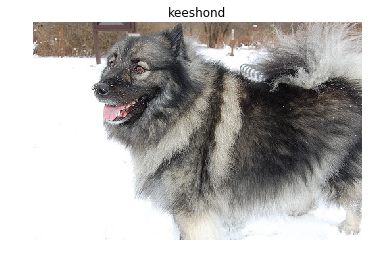

In [ ]:
tfm.show(xyd)

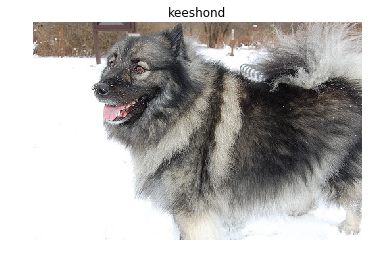

In [ ]:
pets.show(pets.get(0,1))

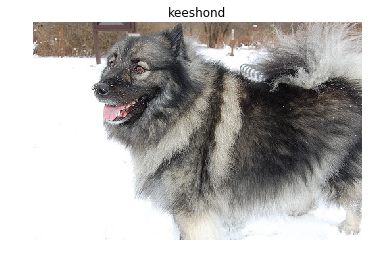

In [ ]:
pets.valid.show_at(0)